In [9]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing  import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [10]:
data = pd.read_csv('/content/StudentScore.xls - StudentScore.xls.csv')

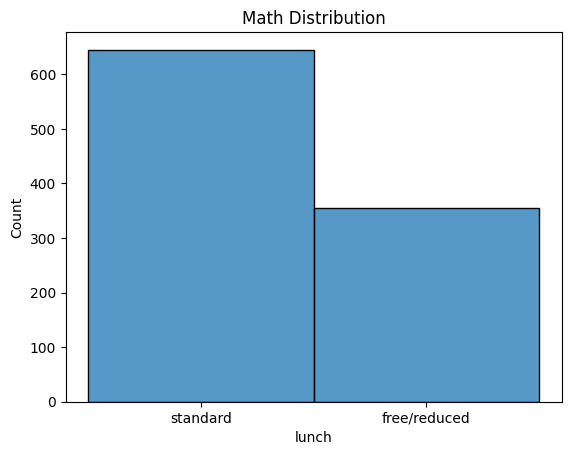

In [11]:
sn.histplot(data["lunch"])
plt.title("Math Distribution")
plt.show()

In [12]:
print(data['parental level of education'].unique())
print(data['lunch'].unique())
print(data['race/ethnicity'].unique())

data.head()

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['group B' 'group C' 'group A' 'group D' 'group E']


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
x = data.drop("math score", axis=1)
y = data["math score"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

nums_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())
])

ord_p = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]
ord_g = data['gender'].unique()
ord_l = data['lunch'].unique()
ord_t = data['test preparation course'].unique()
ord_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(categories=[ord_p, ord_g, ord_l, ord_t]))
])

nom_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

'''
x_train[["reading score", "writing score"]] = nums_transformer.fit_transform(x_train[["reading score", "writing score"]])
x_test[["reading score", "writing score"]] = nums_transformer.transform(x_test[["reading score", "writing score"]])

x_train[["parental level of education"]] = ord_transformer.fit_transform(x_train[["parental level of education"]])
x_test[["parental level of education"]] = ord_transformer.transform(x_test[["parental level of education"]])

x_test['parental level of education'].unique()
'''

preprocessor = ColumnTransformer(transformers=[
    ('nums', nums_transformer, ["reading score", "writing score"]),
    ('ord', ord_transformer, ["parental level of education", "gender", "lunch", "test preparation course"]),
    ('nom', nom_transformer, ["race/ethnicity"])
])

reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])


#x_train = preprocessor.fit_transform(x_train)
#x_test = preprocessor.transform(x_test)
#x_train = pd.DataFrame(x_train, columns=preprocessor.get_feature_names_out()) # changing to dataframe for visualization
#x_test = pd.DataFrame(x_test, columns=preprocessor.get_feature_names_out())  # changing to dataframe for visualization

#print(x_train)
'''
model_svm = SVR()
model_svm.fit(x_train, y_train)
y_predict1 = model_svm.predict(x_test)

model_linear = LinearRegression()
model_linear.fit(x_train, y_train)
y_predict2 = model_linear.predict(x_test)

print("svm")
print(mean_absolute_error(y_test, y_predict1))
print(mean_squared_error(y_test, y_predict1))

print()

print("linear")
print(mean_absolute_error(y_test, y_predict2))
print(mean_squared_error(y_test, y_predict2))

x_train

'''

'\nmodel_svm = SVR()\nmodel_svm.fit(x_train, y_train)\ny_predict1 = model_svm.predict(x_test)\n\nmodel_linear = LinearRegression()\nmodel_linear.fit(x_train, y_train)\ny_predict2 = model_linear.predict(x_test)\n\nprint("svm")\nprint(mean_absolute_error(y_test, y_predict1))\nprint(mean_squared_error(y_test, y_predict1))\n\nprint()\n\nprint("linear")\nprint(mean_absolute_error(y_test, y_predict2))\nprint(mean_squared_error(y_test, y_predict2))\n\nx_train\n\n'

In [14]:
'''
reg.fit(x_train, y_train)
y_predict = reg.predict(x_test)

for a,b in zip(y_test, y_predict):
  print(a,b)

print()
print(mean_squared_error(y_test, y_predict))
print(mean_absolute_error(y_test, y_predict))
'''

'\nreg.fit(x_train, y_train)\ny_predict = reg.predict(x_test)\n\nfor a,b in zip(y_test, y_predict):\n  print(a,b)\n\nprint()\nprint(mean_squared_error(y_test, y_predict))\nprint(mean_absolute_error(y_test, y_predict))\n'

In [15]:
parameters = {
    "regressor__n_estimators": [50, 100, 200, 300],
    "regressor__criterion": ["squared_error", "absolute_error", "poisson"],
    "preprocessor__nums__imputer__strategy": ['median', 'mean'],
}

model = GridSearchCV(reg, param_grid = parameters, scoring="r2")
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [16]:
print(model.best_score_)
print(model.best_params_)

0.8392153727665905
{'preprocessor__nums__imputer__strategy': 'median', 'regressor__criterion': 'absolute_error', 'regressor__n_estimators': 300}


In [17]:
!pip install lazypredict

In [18]:
from lazypredict.Supervised import LazyRegressor

x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

lazyreg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = lazyreg.fit(x_train, x_test, y_train, y_test)

print(predictions)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
100%|██████████| 42/42 [00:03<00:00, 10.87it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000557 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 158
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 11
[LightGBM] [Info] Start training from score 66.496250
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -